In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [15]:
# the first step of model training is to transform categorical data into numerical form
# in second step we are assigning label data into the variables(x = all features it have, y = what can we predict)
# in third step we need to split data into training and testing part
# after splitting we do feature scaling on our training data(standard deviation)
# whenever we use scaling to transform data it will converted into numpy array, so we need to conver it pandas by using pd.DataFrame()
# train the model
# model.coef_
# model.score(x_test/train, y_test/train) used for r2 score which is used know model accuracy




In [16]:
# code for loading the file from local system
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
  print(f'User uploaded file "{filename}"')

Saving StudentPerformance.csv to StudentPerformance (1).csv
User uploaded file "StudentPerformance (1).csv"


In [17]:
df = pd.read_csv('StudentPerformance.csv')

In [18]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [19]:
def encode(a):
  if a == "Yes":
    return 1
  else:
    return 0

In [20]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(encode)

In [21]:
df.drop(['Extracurricular Activities'], axis = 1, inplace = True)

In [22]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [23]:
x = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.16, random_state=32)

In [25]:
#we done splitting of our data into in training and testing section
#we need to standardize our data so the features may close to each other

In [26]:
stand = StandardScaler()

In [27]:
new = stand.fit_transform(x_train)
#here our data is not in standard form so we are using StandardScaler() and fit_transform function
#whenever we use transform function it conerts the data in numpy array so we require to convert them in pandas


In [28]:
#now we stored the standardized data into a new variable but x_train is not standardize yet , so we need to assign new in x_train with their original column and in pandas's format
x_train = pd.DataFrame(new, columns= x_train.columns)

In [29]:
# now stardize the test data
new = stand.fit_transform(x_test)
x_test = pd.DataFrame(new, columns= x_test.columns)

In [30]:
#so now our data is ready for training
model = LinearRegression() #linearregression function is used because here we are making model of linear equations
model.fit(x_train, y_train)#now our model is trained

LinearRegression()

In [ ]:
#now lets finding the weight of our features      w1*x1+w2*x2......wn*xn+w0
model.coef_

array([ 7.39235246e+00,  1.77027522e+01, -2.99760217e-15,  8.13746067e-01,
        5.51645023e-01])

In [ ]:
model.intercept_          #intercept is our w0

np.float64(55.20559523809523)

In [ ]:
model.predict(x_test)  #model prediction

array([16.44107273, 29.27383371, 87.91713369, ..., 78.3869221 ,
       83.75002974, 24.53830417])

In [ ]:
model.score(x_test,y_test)

0.9880050409645883

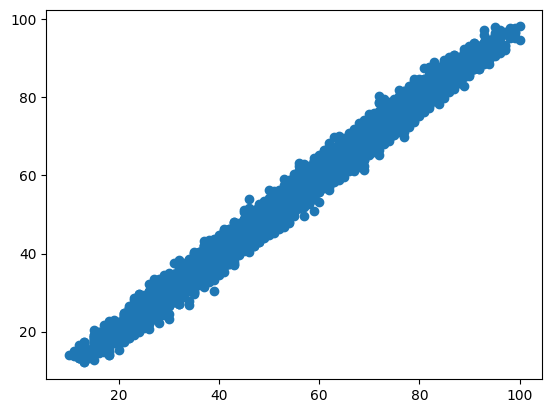

In [34]:
plt.scatter(y_train, model.predict(x_train))

In [ ]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,0,4,2,23.0
9996,7,64,0,8,5,58.0
9997,6,83,0,8,5,74.0
9998,9,97,0,7,0,95.0


In [ ]:
x = df[['Previous Scores']]
y = df[['Performance Index']]

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=39)

In [ ]:
newmodel = LinearRegression()


In [ ]:
newmodel.fit(x_train, y_train)

LinearRegression()

In [ ]:
newmodel.coef_

array([[1.02293575]])

In [ ]:
newmodel.intercept_

array([-15.82738907])

In [ ]:
newmodel.predict(x_test)

array([[82.37444336],
       [81.3515076 ],
       [64.98453553],
       ...,
       [27.13591262],
       [51.68637073],
       [53.73224223]])

In [ ]:
newmodel.score(x_train,y_train)

0.8394543898176184

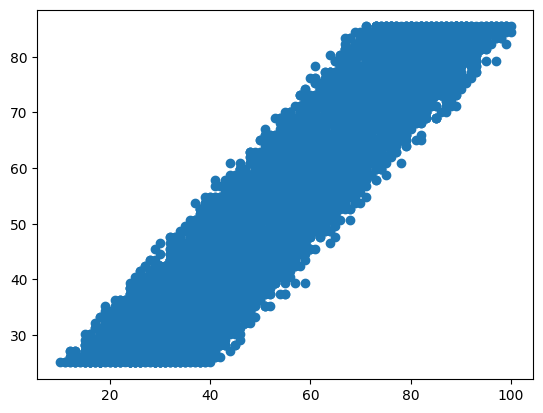

In [ ]:

plt.scatter(y_train, newmodel.predict(x_train))
